<a href="https://colab.research.google.com/github/ploydang/emag_acy67/blob/main/66050225_lecture3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/nayot/emag-jupyter/refs/heads/main/pics/lecture_banner.webp)
# LECTURE 03 Coulomb's Law

# 514336 Engineering Electromagnetic Field

## กฎของคูลอมป์
**ตัวอย่าง 2.1**
กำหนดให้มีประจุ $Q=3\times 10^{-4}~\mathrm{C}$ วางอยู่ที่จุด $M(1, 2, 3)$ และประจุ $Q_2=-10^{-4}~\mathrm{C}$ วางอยู่ที่จุด $N(2, 0, 5)$ ในสุญญากาศ จงหาแรงที่กระทำกับประจุ $Q_2$ เนื่องจากประจุ $Q_1$

![](https://github.com/nayot/emag-jupyter/blob/main/pics/coulomb.png?raw=True)

**หมายเหตุ** Code ต่อไปนี้มีการเรียกใช้ค่าคงที่ทางวิทยาศาสตร์จาก package scipy หากยังไม่มี ให้ !pip install scipy

In [2]:
!pip install scipy
import sympy as smp
from scipy.constants import epsilon_0, pi

In [14]:
x, y, z = smp.symbols('x y z')


In [ ]:
# หา Displacement Vector R_12
r1 = smp.Matrix([1, 2, 3])
r2 = smp.Matrix([2, 0, 5])

R = r2 - r1
R

Matrix([
[ 1],
[-2],
[ 2]])

In [15]:
# หา Unit Vector a_12
a_12 = R / R.norm()
a_12

Matrix([
[(x - 1)/sqrt(z**2 + (x - 1)**2 + (y + 1)**2)],
[(y + 1)/sqrt(z**2 + (x - 1)**2 + (y + 1)**2)],
[      z/sqrt(z**2 + (x - 1)**2 + (y + 1)**2)]])

In [16]:
# หาแรงจากกฎของคูลอมป์
Q1 = 3e-4
Q2 = -1e-4

F2 = Q1*Q2 / (4*pi*epsilon_0)*R / R.norm()**3
F2

Matrix([
[ (269.626553585124 - 269.626553585124*x)/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)],
[(-269.626553585124*y - 269.626553585124)/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)],
[                     -269.626553585124*z/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)]])

In [17]:
# (optional) หาขนาดของแรง
F2.norm()


sqrt(72698.4783981917*z**2/(z**2 + (x - 1)**2 + (y + 1)**2)**3 + (269.626553585124*x - 269.626553585124)**2/(z**2 + (x - 1)**2 + (y + 1)**2)**3 + (269.626553585124*y + 269.626553585124)**2/(z**2 + (x - 1)**2 + (y + 1)**2)**3)

### Activity 3.1
จากโจทย์ในตัวอย่างที่ 2.1 จงหาแรงที่กระทำกับประจุ $Q_1$ เนื่องจากประจุ $Q_2$

In [18]:
import sympy as smp
from scipy.constants import epsilon_0, pi

In [19]:
def F_1():
    # YOUR CODE HERE
    r1 = smp.Matrix([1, 2, 3])
    r2 = smp.Matrix([2, 0, 5])

    R = r1 - r2
    Q1 = 3e-4
    Q2 = -1e-4

    F1 = Q1*Q2 / (4*pi*epsilon_0)*R / R.norm()**3
    return F1

    raise NotImplementedError()

In [20]:
# ทดสอบ F_1()
F_1()

Matrix([
[ 9.98616865130089],
[-19.9723373026018],
[ 19.9723373026018]])

In [21]:
# ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert 29.957 <= F_1().norm() <= 29.959

## 2.2 ความเข้มสนามไฟฟ้า
สนามไฟฟ้า (Electric Field Intensity) เนื่องจากประจุแบบจุดที่วางอยู่ที่จุดกำเนิด

$$\mathbf{E(r)}=\frac{Q}{4\pi\epsilon_0}\frac{\mathbf{r}}{|\mathbf{r}|^3},\qquad\mathrm{V/m}$$

เมื่อ $\mathbf{r}$ คือ เวคเตอร์ตำแหน่งของจุดสังเกต

สนามไฟฟ้า เนื่องจากประจุแบบจุดที่วางอยู่ที่จุดใด ๆ ซึ่งระบุโดย $\mathbf{r'}$

$$\mathbf{E(r)}=\frac{Q}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}\qquad\mathrm{V/m}$$

**ตัวอย่าง 2.2** จงหาสนามไฟฟ้า $\mathbf{E}(x, y, z)$ เนื่องจากประจุแบบจุดขนาด $Q$ ที่วางอยู่ที่จุดกำเนิด ณ จุด $(x, y, z)$ ใด ๆ

In [22]:
from scipy.constants import pi , epsilon_0
epsilon_0

import sympy as smp
import scipy.constants as sp

# กำหนดตัวแปร "ต้น" ต่าง ๆ ที่ใช้ใน sympy
Q, x, y, z, pi, epsilon_0 = smp.symbols('Q x y z pi epsilon_0', real=True)

In [23]:
# position vector r ที่กำหนดจุดสังเกต
r = smp.Matrix([x,y,z])
r

Matrix([
[x],
[y],
[z]])

In [24]:
# สนามไฟฟ้า E จากกฎของคูลอมป์
E = Q/(4*pi*epsilon_0)*r/r.norm()**3
E

Matrix([
[Q*x/(4*epsilon_0*pi*(x**2 + y**2 + z**2)**(3/2))],
[Q*y/(4*epsilon_0*pi*(x**2 + y**2 + z**2)**(3/2))],
[Q*z/(4*epsilon_0*pi*(x**2 + y**2 + z**2)**(3/2))]])

In [25]:
# ทดลองแ ทนค่า เพื่อหาค่าที่เป็นตัวเลข (Numerical Values)
E_sym = E.subs({Q: 1e-6, pi: sp.pi, epsilon_0: sp.epsilon_0})
E_sym.subs({x: 1, y: 1 ,z: 1})

Matrix([
[998.616865130089*sqrt(3)],
[998.616865130089*sqrt(3)],
[998.616865130089*sqrt(3)]])

### Activity 2.2
จงปรับแก้ Code ข้างต้น เพื่อสร้างฟังก์ชัน E() ที่จะ return สนามไฟฟ้า ณ ตำแหน่ง $(x, y, z)$ ใด ๆ เนื่องจากประจุแบบจุดที่วางอยู่ ณ ตำแหน่ง $(x', y', z')$

**หมายเหตุ** การที่กำหนดให้ต้องตอบในรูปฟังก์ชัน เพื่อประโยชน์ของการตรวจคำตอบอัตโนมัติ

In [26]:
# เพื่อความสะดวกในการทดสอบ ยังไม่ต้องนำ Code ใส่ในฟังก์ชัน

import sympy as smp
# กำหนดตัวแปรต้นที่ต้องใช้
Q, pi, epsilon_0 = smp.symbols('Q pi epsilon_0', real=True)
x, y, z, xp, yp, zp = smp.symbols("x y z x' y' z'", real=True)

# YOUR CODE HERE
r = smp.Matrix([x,y,z])
rp = smp.Matrix([xp,yp,zp])

R = r-rp

Q/(4*pi*epsilon_0)*R/R.norm()**3


Matrix([
[Q*(x - x')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(y - y')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(z - z')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))]])

In [27]:
import sympy as smp
# เมื่อทดสอบจนเป็นที่พอใจแล้ว ให้นำ Code มาใส่ในฟังก์ชัน E() เพื่อให้ระบบสามารถตรวจได้
def E():
    Q, pi, epsilon_0 = smp.symbols('Q pi epsilon_0', real=True)
    x, y, z, xp, yp, zp = smp.symbols("x y z x' y' z'", real=True)

    # YOUR CODE HERE
    r = smp.Matrix([x,y,z])
    rp = smp.Matrix([xp,yp,zp])

    R = r-rp

    return Q/(4*pi*epsilon_0)*R/R.norm()**3

In [28]:
# Test calling E
E()


Matrix([
[Q*(x - x')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(y - y')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(z - z')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))]])

In [29]:
# ห้ามแก้ไข Cell นี้โดยเด็ดขาด
# Test Calling E()
from IPython.display import display # ใช้ display() จาก IPython เพื่อแสดงสมการใน notebook อย่างสวยงาม
display(E())


Matrix([
[Q*(x - x')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(y - y')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(z - z')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))]])

### การแทนค่าตัวเลขใน Sympy Expressions

ทำได้โดยการใช้ method .subs() และกำหนด input ของ method เป็น dict ที่ระบุค่าตัวเลขของตัวแปรที่ต้องการแทนค่า

In [30]:
# กำหนดให้ E_sym เก็บเวคเตอร์สนามไฟฟ้า ณ จุดใด ๆ
E_sym = E()
E_sym

Matrix([
[Q*(x - x')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(y - y')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))],
[Q*(z - z')/(4*epsilon_0*pi*((x - x')**2 + (y - y')**2 + (z - z')**2)**(3/2))]])

สมมติให้ประจุ $Q=10\mu\mathrm{C}$ วางอยู่ที่จุดกำเนิด ต้องการหาสนามที่ตำแหน่ง $\mathbf{r}=\begin{bmatrix}1\\2\\-1\end{bmatrix}$

In [31]:
# แทนค่า
import scipy.constants as sp

E_sym.subs({
    Q: 10e-6,
    xp: 0 , yp:0 , zp:0,
    x: 1 , y:2 , z:-1,
    pi: sp.pi, epsilon_0: sp.epsilon_0
}).evalf()


Matrix([
[ 6115.25442026611],
[ 12230.5088405322],
[-6115.25442026611]])

### การแปลง Sympy Expression เป็น Numerical Function

อีกวิธีหนึ่งในการคำนวณค่าตัวเลขของของสนาม $\mathbf{E(r)}$ คือ การแปลง Sympy Expression ให้เป็น Python Function ที่สามารถเรียกใช้งานได้ตามปกติ

Function ที่ใช้ในการแปลง Sympy Expression ให้เป็น Python Function คือ sympy.lambdify()

In [32]:
import scipy.constants as sp
# กำหนด Sympy Expression E_sym โดยรับค่ามาจากฟังก์ชัน E() ก่อนหน้า
E_sym = E()

# แทนค่าตัวเลขในตัวแปรที่ทราบค่าแล้ว

E_s = E_sym.subs({
    Q: 10e-6,
    xp: 0 , yp:0 , zp:0,
    pi: sp.pi, epsilon_0: sp.epsilon_0
})
E_s[0]

89875.517861708*x/(x**2 + y**2 + z**2)**(3/2)

In [33]:
!pip install Numpy
import numpy as np
# lambdify
E_x = smp.lambdify([x, y ,z], E_s[0])
E_y = smp.lambdify([x, y ,z], E_s[1])
E_z = smp.lambdify([x, y ,z], E_s[2])

def E_func(x,y,z):
    Ex = E_x(x, y, z)
    Ey = E_y(x, y, z)
    Ez = E_z(x, y, z)
    return np.array([Ex, Ey, Ez])


In [34]:
# ทดสอบ Function E_func
E_func(1, 2, -1)

array([ 6115.25442027, 12230.50884053, -6115.25442027])

### Activity 2.2.2
จงปรับปรุง Code ข้างต้น เพื่อสร้าง Python Function ที่รับค่าตำแหน่ง $(x, y, z)$ และ return ค่าของสนามไฟฟ้า $\mathbf{E(r)}$ ที่เกิดขึ้นเนื่องจากประจุแบบจุดขนาด $-2.5~\mu\mathrm{C}$ ที่วางอยู่ ณ ตำแหน่ง $(1, -1, 0)~\mathrm{m}$

In [35]:
# ใช้ Sympy สร้าง Expression สนามไฟฟ้า E
import sympy as smp
from scipy.constants import pi, epsilon_0

# กำหนดตัวแปรต้นที่ใช้
x, y, z = smp.symbols('x y z', real=True)

# เวคเตอร์ตำแหน่ง/เวคเตอร์ขจัด
r = smp.Matrix([x,y,z])
rp = smp.Matrix([1,-1,0])

R = r-rp

# ขนาดของประจุ
Q = -2.5e-6

# สนามไฟฟ้า E
E_syn = Q/(4*pi*epsilon_0)*R/R.norm()**3

E_syn

Matrix([
[ (22468.879465427 - 22468.879465427*x)/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)],
[(-22468.879465427*y - 22468.879465427)/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)],
[                    -22468.879465427*z/(z**2 + (x - 1)**2 + (y + 1)**2)**(3/2)]])

In [37]:
# ใช้ lambdify() แปลง E เป็น Python Function
import numpy as np
E_func = smp.lambdify([x, y, z], E_syn)



E_func(1, 1, 1)

array([[    0.        ],
       [-4019.35534904],
       [-2009.67767452]])

In [38]:
# ห้ามแก้ไข Cell นี้โดยเด็ดขาด

# ตรวจคำตอบ โดยการคำนวณแบบ numerical โดยตรงด้วย Numpy
# หากนิสิตยังไม่เข้าใจส่วนนี้ ก็ยังไม่เป็นไร จะมีการกล่าวถึงต่อไปในภายหลัง

from scipy.constants import pi, epsilon_0
import numpy as np
from numpy.linalg import norm

Q = -2.5e-6
rp = np.array([1, -1, 0])

def E_numer(x, y, z):
    r = np.array([x, y, z])
    R = r - rp
    return Q / (4 * pi * epsilon_0) * R / norm(R)**3

# ตรวจคำตอบ
assert np.abs(norm(E_func(1, 1, 1)) - norm(E_numer(1, 1, 1))) <= 0.001


### การ Plot สนามไฟฟ้า
เพื่อความสะดวกในวิชานี้ ได้เตรียม Library "libemag" สำหรับการ Plot สนามไฟฟ้าใน 2 มิติ นิสิตสามารถ download หรือ clone library ดังกล่าวได้จาก https://github.com ดังนี้

https://github.com/nayot/libemag

ให้นิสิต download หรือ clone library "libemag" ไปไว้ใน folder/directory เดียวกันกับที่ไฟล์ ipynb นี้อยู่ หรืออาจจะสร้าง shortcut หรือ symbolic link ไปที่ไฟล์ดังกล่าว

In [12]:
# ทดสอบว่า libemag ใช้การได้ / หากไม่มี error ถือว่าใช้ได้
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
from libemag.plots import field_plot

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-updw5ptt
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-updw5ptt
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done
  Created wheel for libemag: filename=libemag-0.1.0-py3-none-any.whl size=3462 sha256=93b5edad0aeaa3a9182dd7e8ab5bb100852940bf3db7159d0816cbd5616c5973
  Stored in directory: /tmp/pip-ephem-wheel-cache-sj98fabj/wheels/0f/00/7e/4522fe8918f38e3d7f5c7f03617b15aaa38f2cb60e5a9e6ce2
Successfully built libemag


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### การใช้งานฟังก์ชัน field_plot()
```python
field_plot(field_func, num_grids=20,\
    x_min=-10, x_max=10, y_min=-10, y_max=10,\
    xlabel='x', ylabel='y', title='',\
    contour=False, cmap='plasma', streamline=False, normalising=True,
    normalising_factor=0.05)
```

โดยที่ field_func() เป็นฟังก์ชัน (numerical) ที่ return np.array เวคเตอร์ 2 มิติ ของสนามเวคเตอร์ที่ตำแหน่ง (x, y)

**ตัวอย่าง** มีประจุขนาด $1~\mu\mathrm{C}$ วางอยู่ที่จุดกำเนิด จงพล็อตสนามไฟฟ้า ณ ตำแหน่ง $(x, y)$ ใด ๆ ใน 2 มิติ

In [45]:
# import libraries ที่จำเป็น
import sympy as smp
import numpy as np
from libemag.emag_initials import *
from libemag.plots import field_plot
from scipy.constants import pi, epsilon_0

In [46]:
# กำหนดตัวแปรที่ต้องใช้ใน Sympy
x, y = smp.symbols('x y', real=True)

In [41]:
# กำหนดค่า Q, r, r'
Q = 1e-6
r = smp.Matrix([x,y])
rp = smp.Matrix([0,0])

R = r-rp

In [42]:
# กฎของคูลอมป์
E = Q/(4*pi*epsilon_0)*R/R.norm()**3
E

Matrix([
[8987.5517861708*x/(x**2 + y**2)**(3/2)],
[8987.5517861708*y/(x**2 + y**2)**(3/2)]])

In [43]:
# Lambdify
Ex = smp.lambdify([x, y], E[0])
Ey = smp.lambdify([x, y], E[1])


def E_func(x,y):
    return np.array([
      Ex(x, y),
      Ey(x, y)
    ])

E_func(1,9)

array([ 12.10376902, 108.93392116])

<Axes: xlabel='x', ylabel='y'>

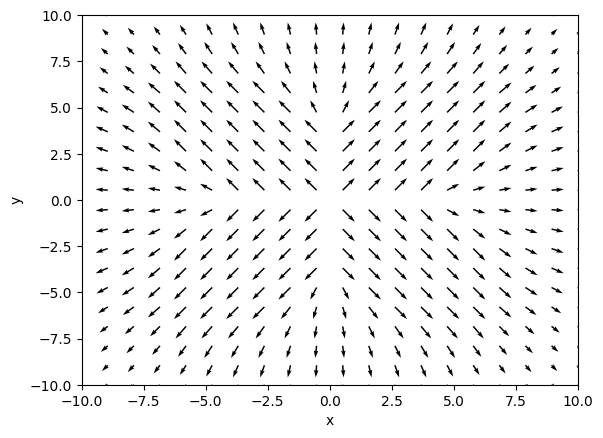

In [47]:
# Plot
field_plot(E_func)